# QuaSaR: Identifying EEW Rings - Waveform Analysis

[Quake Safe Rings](./1a_stations_faultlnes_plot.ipynb) - in our efforts to understand the station waveform data - we are using GeoNet provided [FDSN IRIS SeedLink API](http://ds.iris.edu/ds/nodes/dmc/services/seedlink/). The intent is to:
1. Make use of the SeedLink to get station-wise 3-component (N, E, Z) accelerometer data for a given time window and apply selected picking algorithms to the waverform traces to detect earthquakes
  1. Using the first 3s of the Verticle Displacement Amplitude (___Pd___) is the most common method for calculating the magnitude by applying the autoregression function. This value appears to be valid at least in the magnitude range from 3.0 to 6.5
1. Convert the time-series to tensors to be able to apply linear algebra and calculus on the datasets
1. Formulate station rings based on the class of tensors they belong to (e.g. accelerometers)

In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch between 'default' and 'ignore'

### Class for picking earthquakes

* _get_filtered_trace() returns 

In [2]:
class picks():
    ''' Initialize the picking algorithm model '''
    def __init__(self, model_name = 'lta-sta'):
        super().__init__()
        
        self.model_name = model_name
        all_transforms = []
        
        if self.model_name == None:
            print('Unspecified model_name')
            ''' lta-sta '''
        elif self.model_name == 'lta-sta':
            all_transforms.append('decimate',factor=4, no_filter=False, strict_length=False)
            all_transforms.append('lowpass',freq=0.4*item_tr.stats.sampling_rate / 4.0)
            ''' p-wave '''
        elif self.model_name == 'p-wave':
            all_transforms.append('decimate',factor=4, no_filter=False, strict_length=False)
            all_transforms.append('lowpass',freq=0.4*item_tr.stats.sampling_rate / 4.0)
        else:
            print('Incorrect model name')
        return all_transforms

    def get_bandpass_filtered_trace(self,trance):
        return bandpass_filtered_trace
    def get_fitltered_trace(self,trace, filter: 'bandpass'):
        for idx_tr, item_tr in enumerate(trace):
            tr_new = item_tr.copy()
            tr_new.decimate(factor=4, no_filter=False, strict_length=False)
            tr_filt = item_tr.copy()
            tr_filt.filter('lowpass', freq=0.4*item_tr.stats.sampling_rate / 4.0)


        return filtered_trace
    def get_station_trace(self,station_code = 'KIKS',startdt = None, enddt = None):
        pass

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Get stations
Reuses the class defined in 1c

In [1]:
import sys
sys.path.insert(1, '../lib')

import stations
import faults

''' TODO send time window '''
cls_st = stations.station_data()
__client = cls_st.get_client()
#lst_val_st, lst_inval_st = cls_st.get_stations(cls_st.get_client())
lst_val_st, lst_inval_st = cls_st.get_stations(__client)
print(f'Number of valid stations: {len(lst_val_st)}')

Retrieving active stations with a 
start-time: 2021-02-11T08:12:28.081327Z 
 & end-time: 2021-02-18T08:12:28.081393Z
FDSN Webservice Client (base url: http://service.geonet.org.nz)
Available Services: 'dataselect' (v1.1), 'event' (v1.1), 'station' (v1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


Number of valid stations: 450


### Method to get traces

1. Get the station fault clusters from 1c to prepare the set of groups of station clusters. Each group must contain, at least, 4 stations. Since these groups are formed such that they are in close proximity to a fault line.     
1. For each of the station groups, get the waveforms (i.e. traces) from FDSN for each station for a common window; typically, a 10 minute sliding window.
1. Cleanup the traces with a bandpass filter or any other desirse filtered to each trace before calculating the source parameters, it is necessary to eliminate low-frequency noise below 0.5 Hz in a 1s time-series cannot be evaluated, and since low frequencies may have large spectral amplitudes, high-pass filtering with a cut-off frequency of 0.5 Hz or above is required. The high-frequency noise, above 25 Hz, almost always has spectral amplitudes several orders of magnitude lower than the peak spectral amplitude. As, in addition, the rise time of the first acceleration peak is only marginally contaminated, application of a low- pass filter appears to be unnecessary. 
   1. [Remove respons to prevent overamplification](https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html) while convolving the inverted instrument spectrum
1. Run the cleaned traces through a selected ground-motion earthquake detection and characterization method (subsequently finite fault, point source) to pick earthquakes -- either based on an energy method, autoregressive method, or Artificial Neural Network (ANN) method
   1. ___sta-lta___ (short time average over long time average) variations (recursive, carl, etc) 

No data available for ABAZ


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


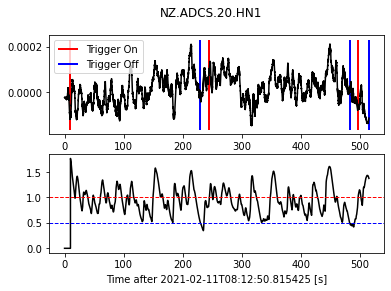

No data available for AKCZ
No data available for AKSS
No data available for ALRZ


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


KeyboardInterrupt: 

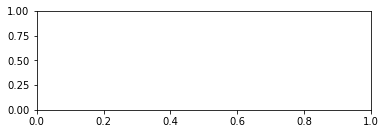

In [2]:
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, plot_trigger
from obspy.geodetics import inside_geobounds
from obspy import UTCDateTime

tStart = UTCDateTime.now()-518400 #6 days ago = 60s x 60m x 24h
tEnd = UTCDateTime.now()-432000 #1 day in the future = 60s x 60m x 24h

#cls_st = stations.station_data()
#__client = cls_st.get_client()

for st_idx, (st_code, st_type, st_lat, st_lon) in enumerate(lst_val_st):
    try:
        print(f'Getting waveform data for',)
        trace = cls_st.get_station_waveform(client=__client,station_code=st_code,StartTime=tStart,EndTime=tEnd)
#        trace = cls_st.get_station_waveform(client=__client,station_code=st_code)
        trace.plot()
        trace.remove_response(output='VEL')

        for idx_tr, item_tr in enumerate(trace):
            sample_rate = item_tr.stats.sampling_rate
            item_tr.filter('lowpass', freq=0.4*item_tr.stats.sampling_rate / 4.0)
            cft = recursive_sta_lta(item_tr.data, int(5 * sample_rate), int(10 * sample_rate))
            plot_trigger(item_tr, cft, 1.0, 0.5)
        break
    except Exception:
        print(f'No data available for {st_code}')
        pass

In [2]:
''' DEPRECATE '''
for st_idx, (st_code, st_type, st_lat, st_lon) in enumerate(lst_val_st):
    if st_code == 'KIKS':
        trace = cls_st.get_station_waveform(client=__client,station_code=st_code)
        print(trace[0:3])
#        trace.plot(type="relative")
#        trace.plot()

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


3 Trace(s) in Stream:
NZ.KIKS.20.HN1 | 2021-02-04T13:00:24.180000Z - 2021-02-06T00:00:00.335000Z | 200.0 Hz, 25195232 samples
NZ.KIKS.20.HN2 | 2021-02-04T13:00:24.180000Z - 2021-02-06T00:00:01.325000Z | 200.0 Hz, 25195430 samples
NZ.KIKS.20.HNZ | 2021-02-04T13:00:24.180000Z - 2021-02-06T00:00:00.435000Z | 200.0 Hz, 25195252 samples


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


[ObsPy trigger-picker](https://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html) offers a multitude of algorithms and functions to apply common EQ picks such as Classic Short Time Average through Long Time Average (STA/LTA).

Component[0] with trace stats 
               network: NZ
               station: KIKS
              location: 20
               channel: HN1
             starttime: 2021-02-04T00:04:16.080000Z
               endtime: 2021-02-05T00:00:01.475000Z
         sampling_rate: 200.0
                 delta: 0.005
                  npts: 17229080
                 calib: 1.0
_fdsnws_dataselect_url: http://service.geonet.org.nz/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 43186, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 65353216})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2021, 2, 11, 0, 4, 16, 80000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2021, 2, 4, 0, 4, 16, 80000))']
              response: Channel Response
	From m/s**2 () to count ()
	Overall Sensitivity: 427336 defined at 1.000 Hz
	6 stages:
		Stage 1: PolesZerosRespons

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/obspy/signal/trigger.py:562: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


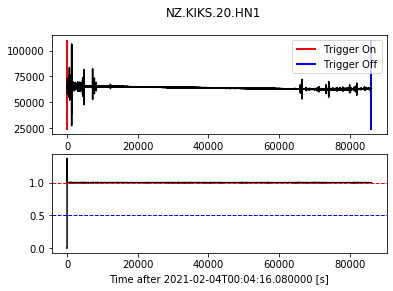

In [5]:
''' DEPRECATE '''
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, plot_trigger
#from obspy.signal.trigger import plot_trigger

for idx_tr, item_tr in enumerate(trace):
    print(f'Component[{idx_tr}] with trace stats \n{item_tr.stats}')
    df = item_tr.stats.sampling_rate
#    cft = classic_sta_lta(item_tr.data, int(5 * df), int(10 * df))
#    plot_trigger(item_tr, cft, 1.0, 0.5)
    cft = recursive_sta_lta(item_tr.data, int(5 * df), int(10 * df))
    plot_trigger(item_tr, cft, 1.0, 0.5)
    break
#    for acc in item_tr:
#        print(acc)

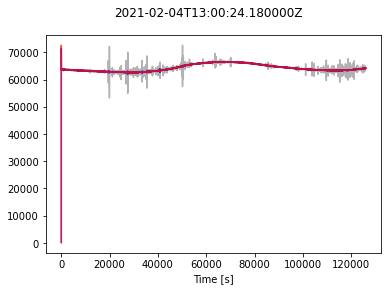

<Figure size 720x720 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, plot_trigger

for idx_tr, item_tr in enumerate(trace):

    tr_new = item_tr.copy()
    tr_new.decimate(factor=4, no_filter=False, strict_length=False)
    tr_filt = item_tr.copy()
    tr_filt.filter('lowpass', freq=0.4*item_tr.stats.sampling_rate / 4.0)
    '''
        Now let’s plot the raw and filtered data...
        >>> trace.data = contains all the data in a numpy ndarray 
        >>> trace.stats.sample_rate = the data sampling rate
        >>> trace.stats.npts = the sample count of data
        >>> trace.stats.delta = Sample distance in seconds (default value is 1.0)
    '''
    t = np.arange(0, item_tr.stats.npts / item_tr.stats.sampling_rate, item_tr.stats.delta)
    t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,tr_new.stats.delta)
    plt.plot(t, item_tr.data, 'k', label='Raw', alpha=0.3)
    plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
    plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
    plt.xlabel('Time [s]')
#    plt.xlim(82, 83.5)
    plt.suptitle(item_tr.stats.starttime)
#    plt.legend()
    plt.figure(figsize=(10, 10))
    plt.show()
    break

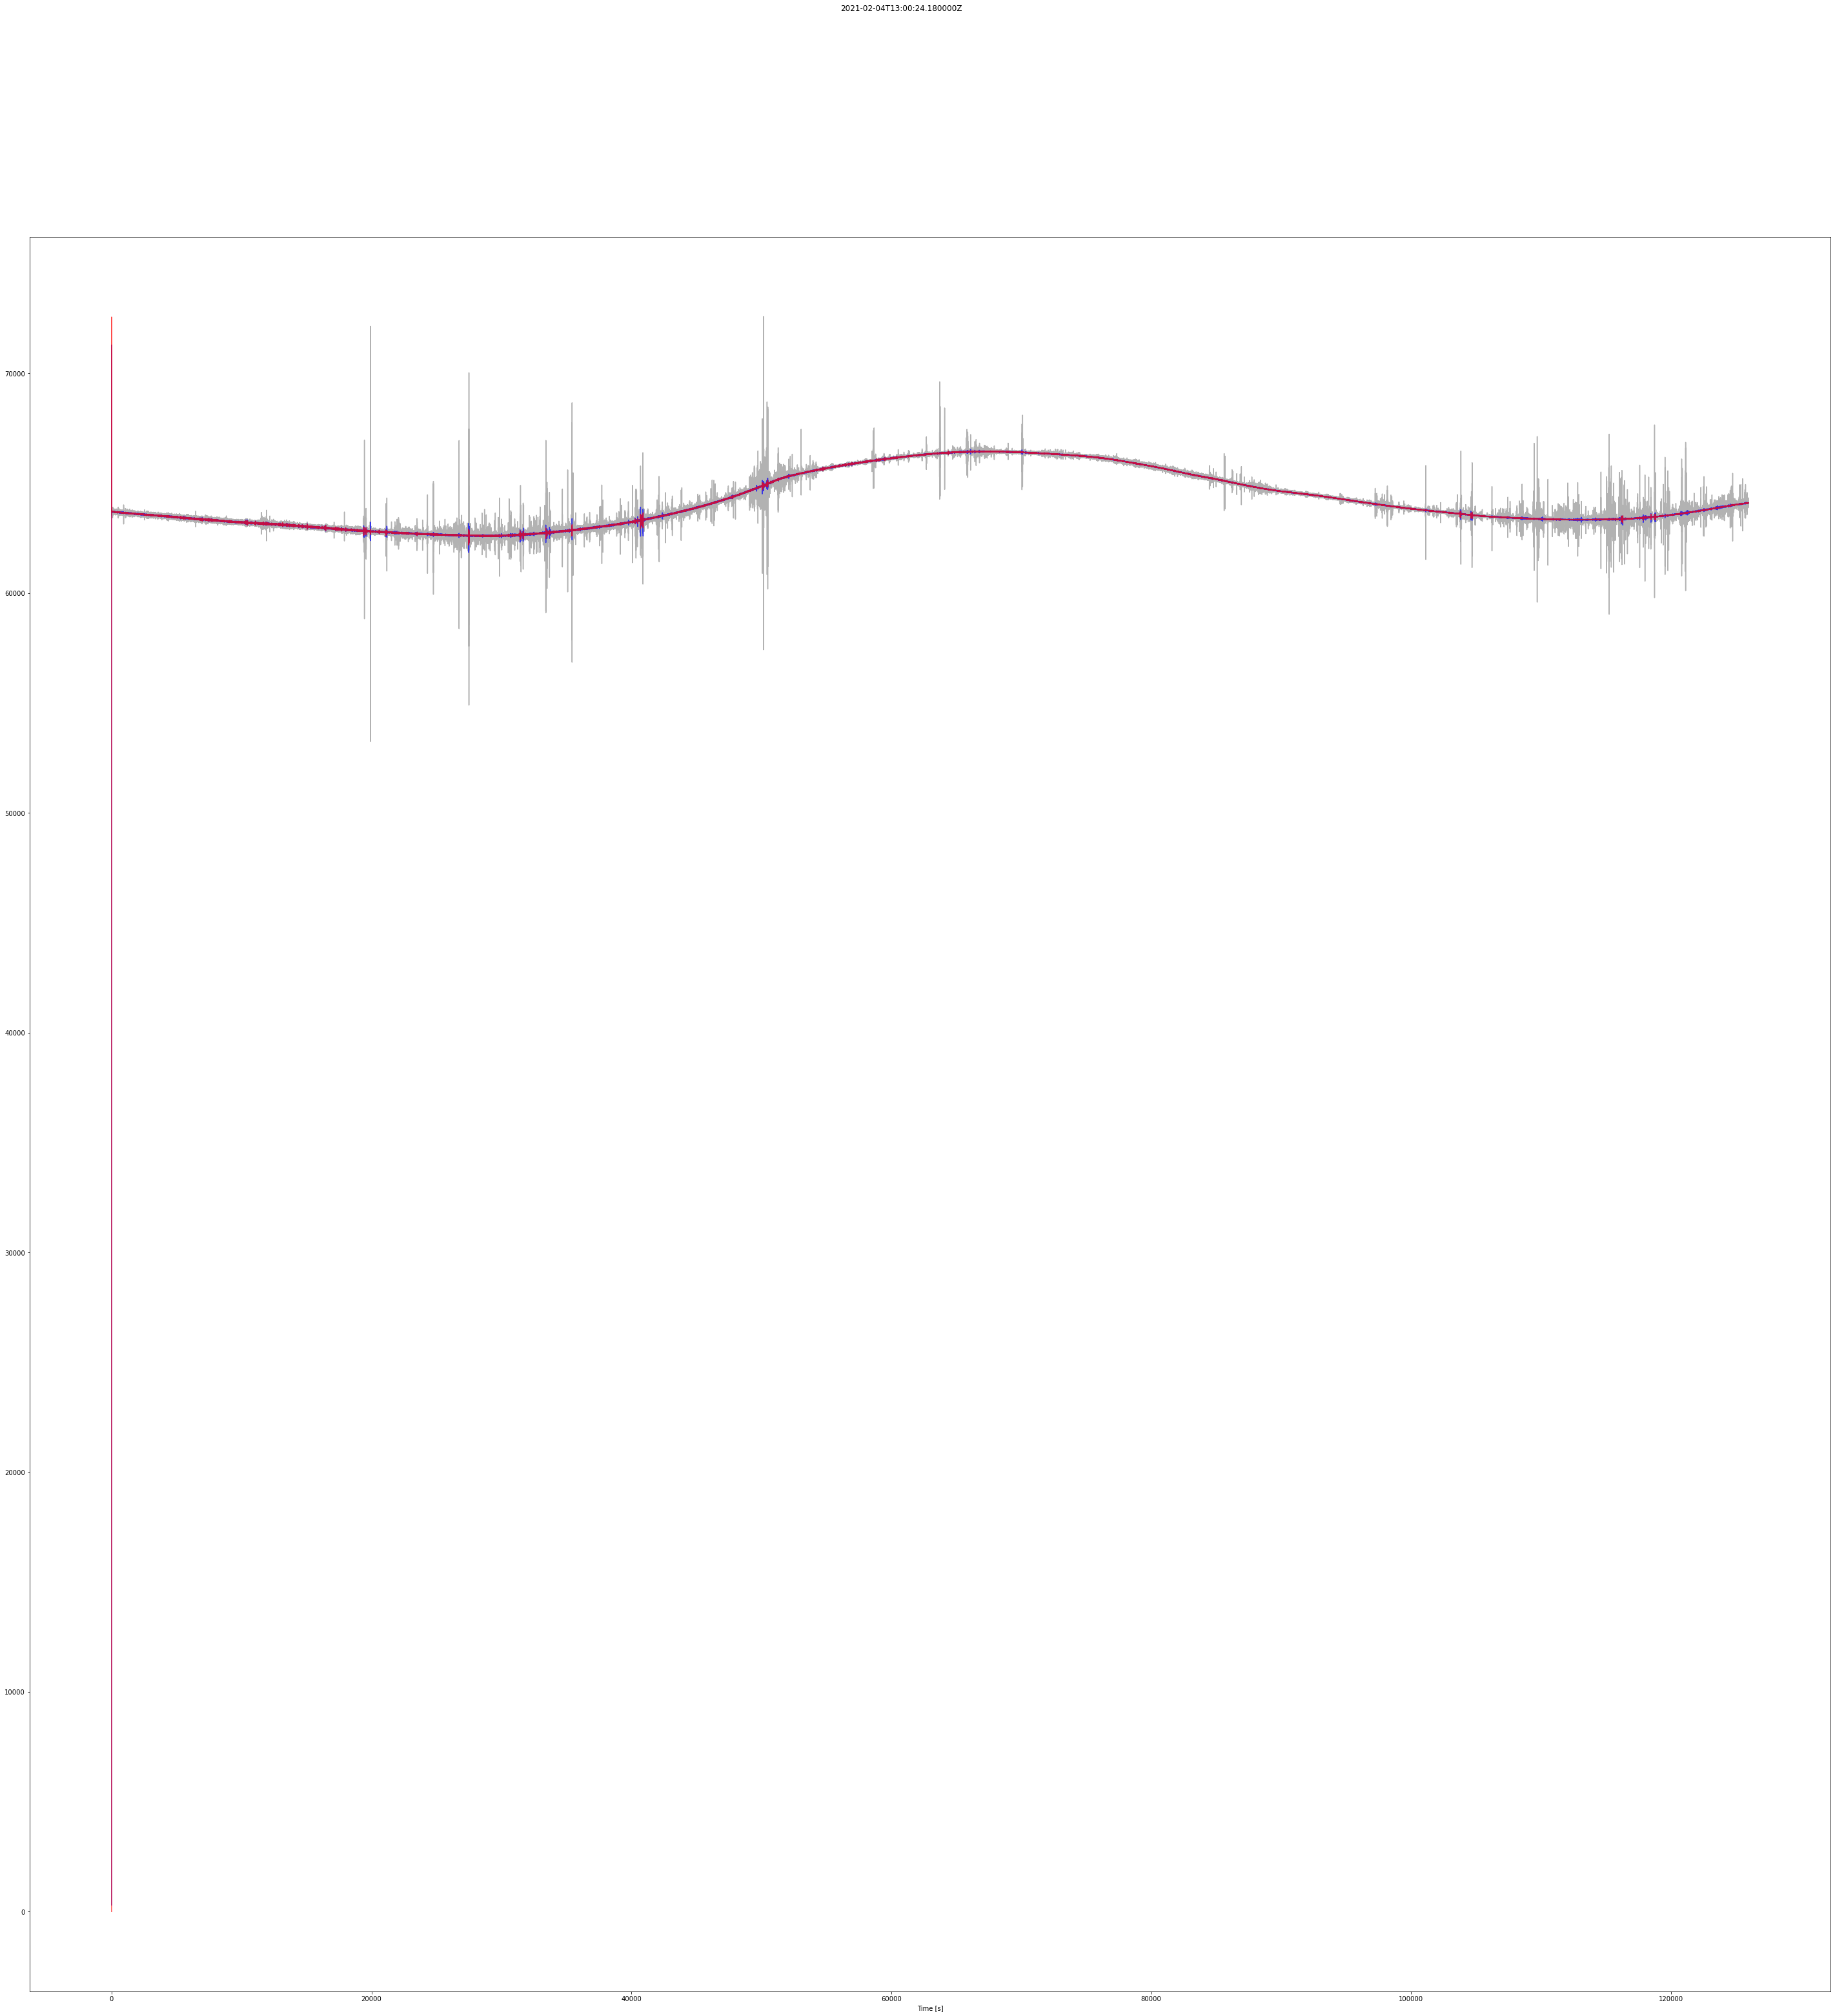

In [7]:
plt.figure(figsize=(50, 20))
plt.plot(t, item_tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
#    plt.xlim(82, 83.5)
plt.suptitle(item_tr.stats.starttime)
#    plt.legend()
plt.show()
